### Random Walks Code

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

import pandas as pd

In [ ]:
def simulate_discrete_rw(T = 1000):

    x = np.zeros(shape = T)

    for t in range(1,T):
        w = np.random.randint(low = 0, high = 2) * 2 - 1
        #w = np.random.normal(0,1)
        x[t] = x[t-1] + w
    return x



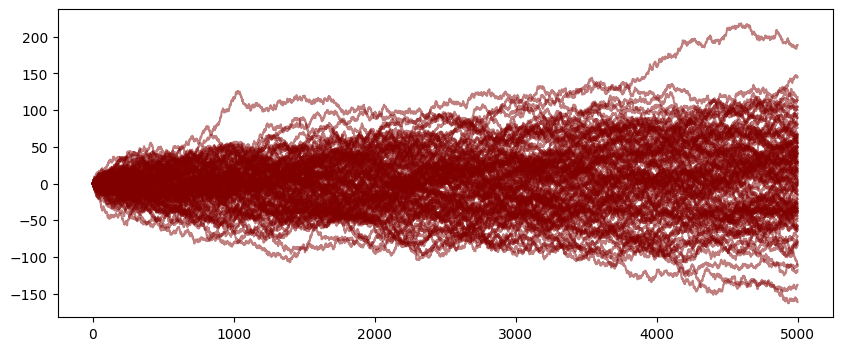

In [45]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_discrete_rw(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

In [19]:
def simulate_random_walk(T : int =100, sigma : float =1.0) -> np.array:

    """Simulates one realization of a discrete random walk process.
    
    Parameters:
    -----------

    T     : int, optional (default: 100)
        The time horizon of te process
    sigma : float, optional (default : 1.0)
        The scale 

    Returns:
    --------
    x : np.ndarray of shape (T, )
        An array containing the simulated random walk trajectory
    """
    x = np.zeros(shape = T)
    for t in range(1, T):
        x[t] = sigma * np.random.normal(0, 1) + x[t-1]
    return x



In [16]:
def simulate_random_walk_noloop(T=100, sigma=1.0):
    x = np.random.normal(loc = 0, scale = sigma, size = T)

    x[0] = 0

    x = np.cumsum(x)

    return x

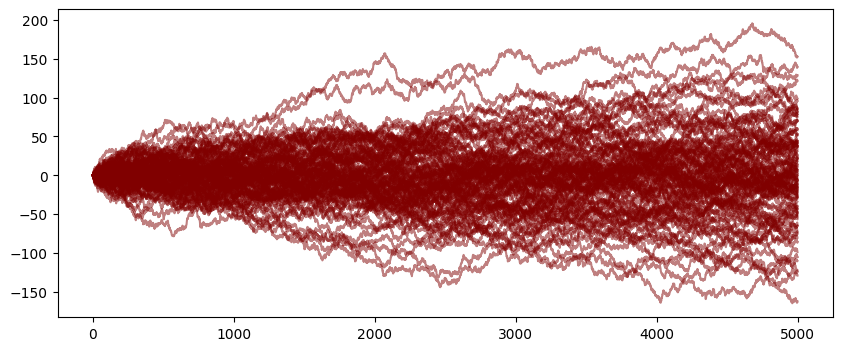

In [17]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_random_walk(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

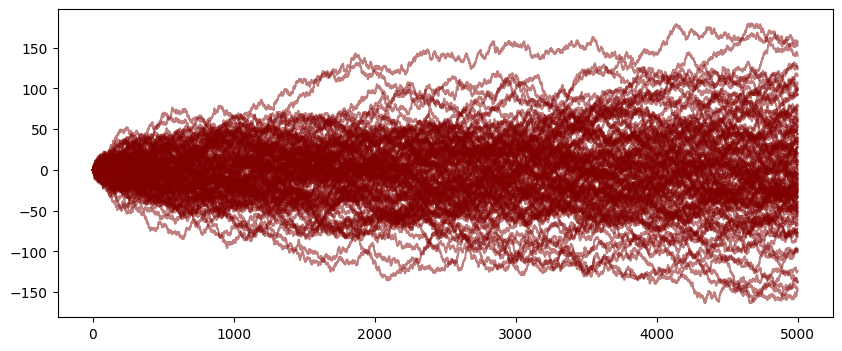

In [18]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_random_walk_noloop(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

In [ ]:
def simulate_diffusion(v, a, beta, tau, dt = 1e-3, scale = 1.0, max_time = 10.):
    t = tau
    num_samples = np.ceil(max_time / dt)
    x = np.zeros(shape = num_samples)
    x[0] = beta
    
    while(t <= max_time):

        t += dt